In [1]:
from datasets import load_dataset
import pandas as pd

In [ ]:
ds = load_dataset("lmarena-ai/arena-human-preference-140k")

KeyboardInterrupt: 

In [ ]:
print(ds)
print("Printed the structure of the `ds` dataset.")

DatasetDict({
    train: Dataset({
        features: ['id', 'model_a', 'model_b', 'winner', 'evaluation_session_id', 'evaluation_order', 'conversation_a', 'conversation_b', 'full_conversation', 'conv_metadata', 'category_tag', 'language', 'is_code', 'timestamp'],
        num_rows: 135634
    })
})
Printed the structure of the `ds` dataset.


In [ ]:
print(ds['train'][0])
print("Printed the first row of the 'train' split to inspect features.")

{'id': 'c4b9710c-8d64-4bee-a0b0-94637ae4cc65', 'model_a': 'gemini-2.5-pro', 'model_b': 'claude-3-7-sonnet-20250219-thinking-32k', 'winner': 'model_a', 'evaluation_session_id': 'a333a685-37f9-474d-b703-f079d8329552', 'evaluation_order': 1, 'conversation_a': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Compare Tormenta20 with DnD5e', 'image': None, 'mimeType': None}]}, {'role': 'assistant', 'content': [{'type': 'text', 'text': 'Excellent question! Comparing **Tormenta20 (T20)** and **Dungeons & Dragons 5th Edition (D&D 5e)** is a fantastic way to understand different approaches to the d20 system. While they share a common ancestor (D&D 3rd Edition), they have evolved in vastly different directions.\n\nHere is a detailed comparison, broken down by key aspects of the games.\n\n---\n\n### **High-Level Philosophy**\n\n*   **D&D 5e:** Aims for **accessibility, streamlined play, and heroic fantasy**. It simplifies many of the complex rules of older editions to be welcoming to new pl

In [ ]:
df = ds['train'].to_pandas()
print("Converted the 'train' split of the dataset to a pandas DataFrame.")

Converted the 'train' split of the dataset to a pandas DataFrame.


In [ ]:
model_scores = {}
model_counts = {}

for index, row in df.iterrows():
    model_a = row['model_a']
    model_b = row['model_b']
    winner = row['winner']

    if model_a not in model_scores:
        model_scores[model_a] = 0.0
        model_counts[model_a] = 0
    if model_b not in model_scores:
        model_scores[model_b] = 0.0
        model_counts[model_b] = 0

    if winner == 'model_a':
        model_scores[model_a] += 1.0
        model_counts[model_a] += 1
        model_counts[model_b] += 1
    elif winner == 'model_b':
        model_scores[model_b] += 1.0
        model_counts[model_b] += 1
        model_counts[model_a] += 1
    elif winner == 'tie':
        model_scores[model_a] += 0.5
        model_scores[model_b] += 0.5
        model_counts[model_a] += 1
        model_counts[model_b] += 1

average_scores = {
    model: model_scores[model] / model_counts[model]
    for model in model_scores if model_counts[model] > 0
}

average_scores_series = pd.Series(average_scores).sort_values(ascending=False)

print("Calculated average scores for each model and stored them in 'average_scores_series'.")

Calculated average scores for each model and stored them in 'average_scores_series'.


In [ ]:
model_prevalence_counts = pd.Series(model_counts)
total_participations = model_prevalence_counts.sum()

model_prevalence_percentages = (model_prevalence_counts / total_participations) * 100
model_prevalence_percentages = model_prevalence_percentages.sort_values(ascending=False)

print("Calculated model prevalence percentages and sorted them.")

Calculated model prevalence percentages and sorted them.


In [ ]:
print("Top 10 models based on average human preference scores:")
print(average_scores_series.head(10))
print("\nBottom 10 models based on average human preference scores:")
print(average_scores_series.tail(10))

Top 10 models based on average human preference scores:
gemini-2.5-pro                         0.688388
gemini-2.5-pro-preview-03-25           0.648928
grok-4-0709                            0.641802
o3-2025-04-16                          0.621517
chatgpt-4o-latest-20250326             0.617388
deepseek-r1-0528                       0.610007
gemini-2.5-pro-preview-05-06           0.605954
grok-3-preview-02-24                   0.604416
llama-4-maverick-03-26-experimental    0.599378
gemini-2.5-flash                       0.595155
dtype: float64

Bottom 10 models based on average human preference scores:
claude-3-7-sonnet-20250219-thinking-32k    0.385435
llama-4-scout-17b-16e-instruct             0.384058
claude-3-5-sonnet-20241022                 0.382294
claude-3-7-sonnet-20250219                 0.377868
llama-3.3-70b-instruct                     0.342907
amazon.nova-pro-v1:0                       0.342901
mistral-small-3.1-24b-instruct-2503        0.339491
claude-3-5-haiku-20241022

In [ ]:
top_10_models = average_scores_series.head(10)
bottom_10_models = average_scores_series.tail(10)

plot_data = pd.concat([top_10_models, bottom_10_models])

print("Prepared data for plotting by combining top 5 and bottom 5 models.")

Prepared data for plotting by combining top 5 and bottom 5 models.


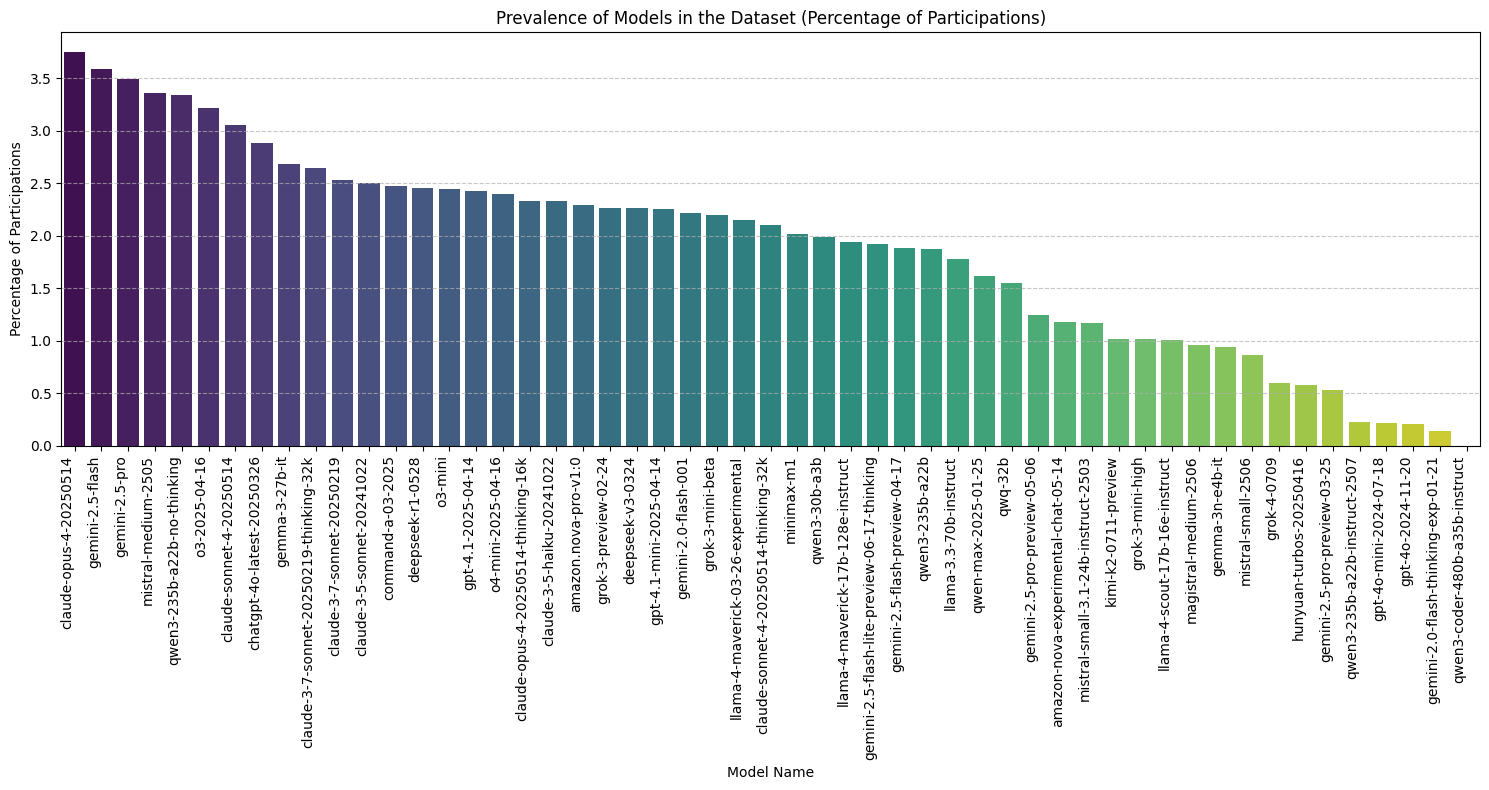

Generated bar plot for model prevalence percentages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x=model_prevalence_percentages.index, y=model_prevalence_percentages.values, hue=model_prevalence_percentages.index, palette='viridis', legend=False)
plt.title('Prevalence of Models in the Dataset (Percentage of Participations)')
plt.xlabel('Model Name')
plt.ylabel('Percentage of Participations')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Generated bar plot for model prevalence percentages.")

In [ ]:
deepseek_models = set()

for model_name in pd.concat([df_en['model_a'], df_en['model_b']]).unique():
    if 'deepseek' in model_name.lower():
        deepseek_models.add(model_name)

print("Unique Deepseek models found in the dataset:")
if deepseek_models:
    for model in sorted(list(deepseek_models)):
        print(f"- {model}")
else:
    print("No Deepseek models found.")

print("Identified unique Deepseek model names.")

Unique Deepseek models found in the dataset:
- deepseek-r1-0528
- deepseek-v3-0324
Identified unique Deepseek model names.


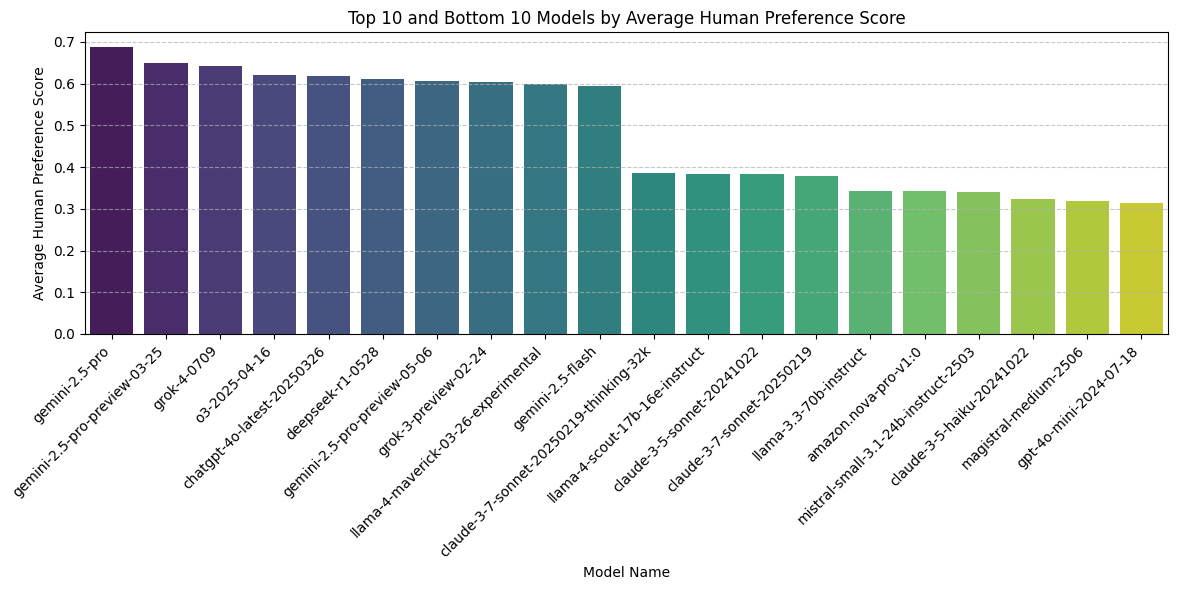

Generated bar plot for top 10 and bottom 10 models.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='viridis', legend=False)
plt.title('Top 10 and Bottom 10 Models by Average Human Preference Score')
plt.xlabel('Model Name')
plt.ylabel('Average Human Preference Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Generated bar plot for top 10 and bottom 10 models.")

In [ ]:
df_en = df[df['language'] == 'en']
print("Filtered the DataFrame to include only English conversations, creating 'df_en'.")

Filtered the DataFrame to include only English conversations, creating 'df_en'.


In [ ]:
primary_category_details = {}

for category_dict in df_en['category_tag']:
    for primary_cat, sub_dict in category_dict.items():
        if primary_cat not in primary_category_details:
            primary_category_details[primary_cat] = {}
        for sub_cat in sub_dict.keys():
            primary_category_details[primary_cat][sub_cat] = primary_category_details[primary_cat].get(sub_cat, 0) + 1

print("Unique primary categories and their sub-category counts:")
for primary_cat, sub_cats in primary_category_details.items():
    print(f"\nPrimary Category: '{primary_cat}'")
    for sub_cat, count in sub_cats.items():
        print(f"  - Sub-category: '{sub_cat}', Occurrences: {count}")

print("\n------------------------------------------------------------------------------------------------------------------------\n")

is_code_distribution = df_en['is_code'].value_counts()
is_code_percentage = df_en['is_code'].value_counts(normalize=True) * 100

print("Distribution of 'is_code' column:")
print(is_code_distribution)
print("\nPercentage distribution of 'is_code' column:")
print(is_code_percentage)

print("Analyzed the 'category_tag' and 'is_code' columns in 'df_en'.")

Unique primary categories and their sub-category counts:

Primary Category: 'creative_writing_v0.1'
  - Sub-category: 'creative_writing', Occurrences: 71175
  - Sub-category: 'score', Occurrences: 71175

Primary Category: 'criteria_v0.1'
  - Sub-category: 'complexity', Occurrences: 71175
  - Sub-category: 'creativity', Occurrences: 71175
  - Sub-category: 'domain_knowledge', Occurrences: 71175
  - Sub-category: 'problem_solving', Occurrences: 71175
  - Sub-category: 'real_world', Occurrences: 71175
  - Sub-category: 'specificity', Occurrences: 71175
  - Sub-category: 'technical_accuracy', Occurrences: 71175

Primary Category: 'if_v0.1'
  - Sub-category: 'if', Occurrences: 71175
  - Sub-category: 'score', Occurrences: 71175

Primary Category: 'math_v0.1'
  - Sub-category: 'math', Occurrences: 71175

------------------------------------------------------------------------------------------------------------------------

Distribution of 'is_code' column:
is_code
False    46809
True     24

In [ ]:
import nltk
nltk.download('punkt', quiet=True)
print("NLTK 'punkt' tokenizer downloaded and ready.")

NLTK 'punkt' tokenizer downloaded and ready.


# Task
Examine the `conv_metadata` column in `df_en` to identify and understand existing token count statistics such as `sum_assistant_a_tokens`, `sum_assistant_b_tokens`, and `sum_user_tokens`, which can be used to derive conversation token length.

## Examine Existing Token Count Features

### Subtask:
Inspect the `conv_metadata` column within the `df_en` DataFrame to identify and understand the existing token count statistics, such as `sum_assistant_a_tokens`, `sum_assistant_b_tokens`, and `sum_user_tokens`, which can be used to derive conversation token length.


**Reasoning**:
To understand the structure of the `conv_metadata` column and identify the token count statistics, I need to print the first few entries of this column from the `df_en` DataFrame.



# Task
Examine the `conv_metadata` column in `df_en` to identify and understand existing token count statistics such as `sum_assistant_a_tokens`, `sum_assistant_b_tokens`, and `sum_user_tokens`, which can be used to derive conversation token length. Create a new column in `df_en` for total token length, calculate its descriptive statistics, and visualize its distribution using a histogram or density plot. Finally, summarize the findings and discuss their implications for further analysis.

## Examine Existing Token Count Features

### Subtask:
Inspect the `conv_metadata` column within the `df_en` DataFrame to identify and understand the existing token count statistics, such as `sum_assistant_a_tokens`, `sum_assistant_b_tokens`, and `sum_user_tokens`, which can be used to derive conversation token length.


**Reasoning**:
To understand the structure and content of the `conv_metadata` column and identify relevant token count statistics, I will print the first few entries of this column from the `df_en` DataFrame.



In [ ]:
print(df_en['conv_metadata'].head())
print("Printed the first few entries of the 'conv_metadata' column.")

0    {'sum_assistant_a_tokens': 1854, 'header_count...
2    {'sum_assistant_a_tokens': 2216, 'header_count...
3    {'sum_assistant_a_tokens': 297, 'header_count_...
5    {'sum_assistant_a_tokens': 1351, 'header_count...
9    {'sum_assistant_a_tokens': 1330, 'header_count...
Name: conv_metadata, dtype: object
Printed the first few entries of the 'conv_metadata' column.


# Task
Extract `sum_assistant_a_tokens` and `sum_assistant_b_tokens` for each model from the `conv_metadata` column in `df_en` and store them in a dictionary mapping each model to a list of its assistant token lengths.

## Extract Model-Specific Assistant Token Lengths

### Subtask:
Iterate through the `df_en` DataFrame and extract the `sum_assistant_a_tokens` and `sum_assistant_b_tokens` from the `conv_metadata` for each model. Store these token lengths, mapping each token count to the specific model that produced it, to create a comprehensive list of all generated token lengths per model.


**Reasoning**:
I will initialize an empty dictionary to store token lengths per model and then iterate through the `df_en` DataFrame. For each row, I will extract `model_a`, `model_b`, `sum_assistant_a_tokens`, and `sum_assistant_b_tokens` from `conv_metadata` and append the respective token lengths to the lists associated with each model in the dictionary.



In [ ]:
model_assistant_token_lengths = {}

for index, row in df_en.iterrows():
    model_a = row['model_a']
    model_b = row['model_b']
    conv_metadata = row['conv_metadata']

    sum_assistant_a_tokens = conv_metadata.get('sum_assistant_a_tokens', 0)
    sum_assistant_b_tokens = conv_metadata.get('sum_assistant_b_tokens', 0)

    if model_a not in model_assistant_token_lengths:
        model_assistant_token_lengths[model_a] = []
    model_assistant_token_lengths[model_a].append(sum_assistant_a_tokens)

    if model_b not in model_assistant_token_lengths:
        model_assistant_token_lengths[model_b] = []
    model_assistant_token_lengths[model_b].append(sum_assistant_b_tokens)

print("Extracted assistant token lengths for each model and stored them in 'model_assistant_token_lengths'.")

Extracted assistant token lengths for each model and stored them in 'model_assistant_token_lengths'.


In [ ]:
model_token_stats = {}

for model, token_lengths in model_assistant_token_lengths.items():
    if token_lengths:
        lengths_series = pd.Series(token_lengths)
        model_token_stats[model] = {
            'mean': lengths_series.mean(),
            'median': lengths_series.median(),
            'min': lengths_series.min(),
            'max': lengths_series.max(),
            'std': lengths_series.std()
        }
    else:
        model_token_stats[model] = {
            'mean': 0,
            'median': 0,
            'min': 0,
            'max': 0,
            'std': 0
        }

model_token_stats_df = pd.DataFrame.from_dict(model_token_stats, orient='index')

print("Calculated descriptive statistics for assistant token lengths for each model and stored them in 'model_token_stats_df'.")

Calculated descriptive statistics for assistant token lengths for each model and stored them in 'model_token_stats_df'.


In [ ]:
print("Models with the highest average assistant token lengths:")
highest_avg_tokens = model_token_stats_df.sort_values(by='mean', ascending=False).head(5)
print(highest_avg_tokens)

print("\nModels with the lowest average assistant token lengths:")
lowest_avg_tokens = model_token_stats_df.sort_values(by='mean', ascending=True).head(5)
print(lowest_avg_tokens)

print("Displayed models with the highest and lowest average assistant token lengths.")

Models with the highest average assistant token lengths:
                                            mean  median  min    max  \
grok-3-preview-02-24                 1840.433140  1435.0    1  48760   
gemini-2.5-flash                     1700.300341  1155.0    0  41957   
grok-3-mini-high                     1626.896122  1182.5    0  30991   
gemini-2.0-flash-thinking-exp-01-21  1598.184211  1239.5   10   9925   
llama-4-maverick-03-26-experimental  1594.253741  1240.0    0  25521   

                                             std  
grok-3-preview-02-24                 2323.449209  
gemini-2.5-flash                     2279.135728  
grok-3-mini-high                     2093.740583  
gemini-2.0-flash-thinking-exp-01-21  1426.592858  
llama-4-maverick-03-26-experimental  1445.774663  

Models with the lowest average assistant token lengths:
                                               mean  median  min    max  \
qwen3-coder-480b-a35b-instruct           413.000000   413.0  413    413 

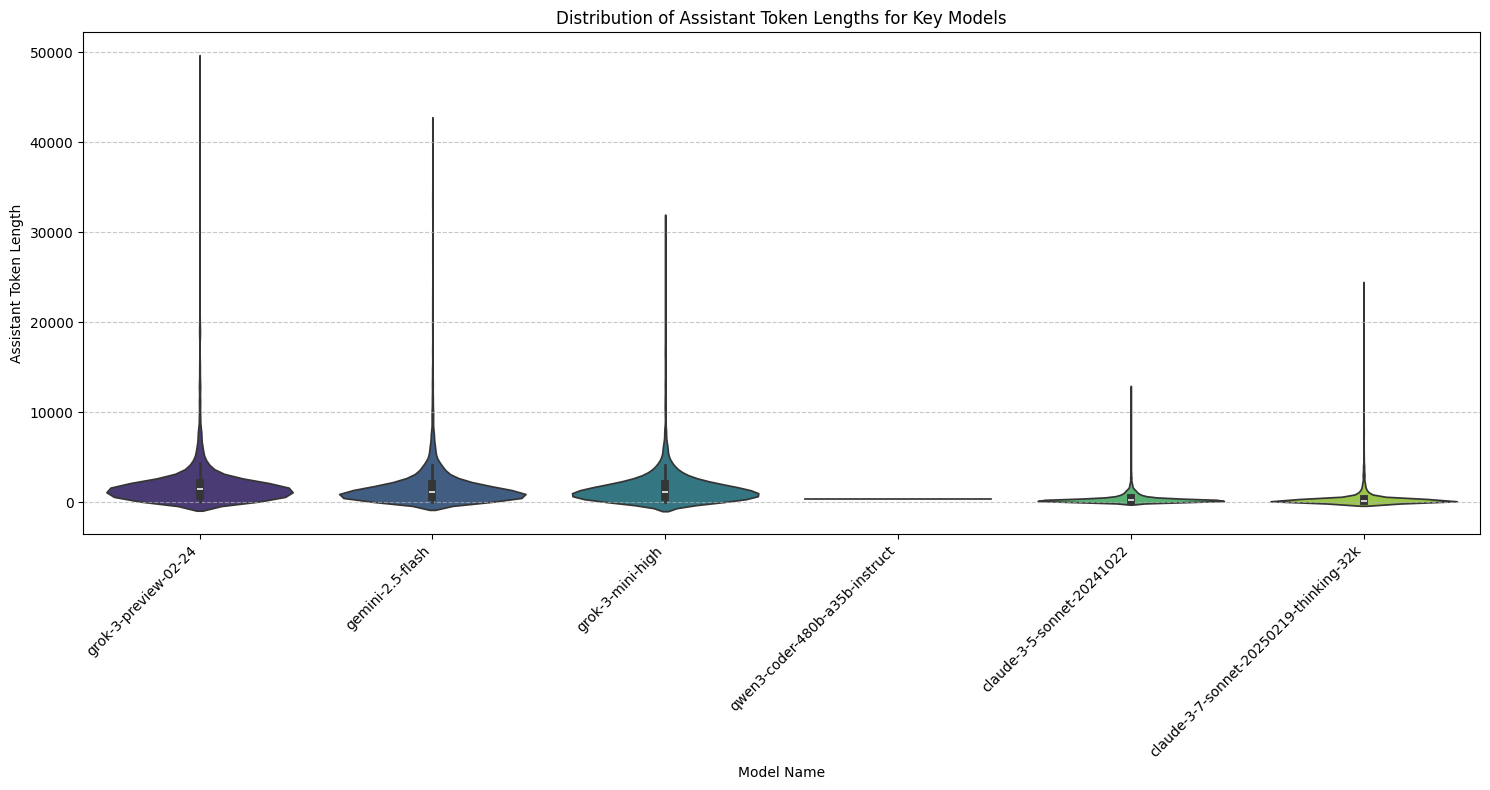

Generated violin plot for the distribution of assistant token lengths for selected models.


In [ ]:
selected_models = \
    highest_avg_tokens.index[:3].tolist() + \
    lowest_avg_tokens.index[:3].tolist()

plot_data_list = []

for model_name in selected_models:
    token_lengths = model_assistant_token_lengths.get(model_name, [])
    for length in token_lengths:
        plot_data_list.append({'model': model_name, 'token_length': length})

plot_df = pd.DataFrame(plot_data_list)


plt.figure(figsize=(15, 8))
sns.violinplot(x='model', y='token_length', data=plot_df, hue='model', palette='viridis', legend=False)
plt.title('Distribution of Assistant Token Lengths for Key Models')
plt.xlabel('Model Name')
plt.ylabel('Assistant Token Length')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Generated violin plot for the distribution of assistant token lengths for selected models.")

# Task
The next step is to prepare the data for LLM judging. This involves identifying specific LLM models to act as judges, extracting conversations from `df_en` where these judge models participated, and then formatting these conversations into a standardized structure for an external LLM judging task.

Based on the average human preference scores and the plan's requirement to study self-preference bias, I'll select the following models as judges:
*   `chatgpt-4o-latest-20250326` (a high-performing model, commonly used as a judge)
*   `deepseek-r1-0528` (another high-performing model, to investigate self-preference)
*   `claude-3-5-haiku-20241022` (a lower-performing model, also commonly used as a judge)
*   `gemini-2.5-pro` (the highest-performing model, to investigate self-preference)

The task will then proceed as follows:
1.  **Identify Judge Models**: Define the list of selected LLM judge models.
2.  **Filter Conversations**: Filter `df_en` to include only those conversations where either `model_a` or `model_b` is one of the identified judge models.
3.  **Format Conversations**: For each filtered conversation, extract the user prompt, the responses from `model_a` and `model_b`, their respective model names, and the human-assigned winner. This information will be structured into a dictionary or similar format suitable for external LLM judging.
4.  **Sample Data**: Create a representative random sample of these formatted conversations to manage the computational cost of LLM judging.
5.  **Save Data**: Save the sampled and formatted conversations to a file (e.g., JSONL) for use with an external LLM judging script.
6.  **Summarize and Outline Bias Analysis**: Summarize the prepared dataset and outline how the LLM's judgments will be compared against human preferences to identify potential self-preference bias.

## Identify Models for LLM Judging

### Subtask:
Define the list of selected LLM judge models.


**Reasoning**:
To define the list of selected LLM judge models as instructed, I will create a Python list named `judge_models` containing the specified string values.



In [ ]:
judge_models = [
    'chatgpt-4o-latest-20250326',
    'deepseek-r1-0528',
    'claude-3-5-haiku-20241022',
    'gemini-2.5-pro'
]
print("Defined the list of selected LLM judge models: 'judge_models'.")

Defined the list of selected LLM judge models: 'judge_models'.


## Filter Conversations for Judge Models

### Subtask:
Filter the `df_en` DataFrame to include only those conversations where either `model_a` or `model_b` is one of the identified judge models. This will create a new DataFrame, `df_judge_conversations`.

### Reasoning:
To isolate conversations relevant to the judge models, I will apply a boolean mask to `df_en`. This mask will check if `model_a` or `model_b` in each row is present in the `judge_models` list. The resulting filtered DataFrame, `df_judge_conversations`, will contain only the conversations involving at least one of our designated judge models.

**Reasoning**:
To filter the DataFrame `df_en` based on the defined `judge_models` list, I will create a boolean condition that checks if either `model_a` or `model_b` for each row is present in the `judge_models` list. This filtered data will be stored in `df_judge_conversations`.



In [ ]:
df_judge_conversations = df_en[
    (df_en['model_a'].isin(judge_models)) |
    (df_en['model_b'].isin(judge_models))
].copy()

print(f"Filtered `df_en` to create `df_judge_conversations` with {len(df_judge_conversations)} rows.")
print("Displaying the first 5 rows of `df_judge_conversations`:")
print(df_judge_conversations.head())

Filtered `df_en` to create `df_judge_conversations` with 15055 rows.
Displaying the first 5 rows of `df_judge_conversations`:
                                      id  \
0   c4b9710c-8d64-4bee-a0b0-94637ae4cc65   
3   4a4380bb-bbdb-495f-8e09-39a08d88a28f   
11  e67468c9-69b7-4b84-9ec2-27879128c4c6   
21  ea444be6-4b60-4d34-83f4-adb191e5279f   
42  b25d3b15-0e7e-4351-bb38-b221e2373e29   

                                  model_a  \
0                          gemini-2.5-pro   
3   claude-sonnet-4-20250514-thinking-32k   
11             chatgpt-4o-latest-20250326   
21                         gemini-2.5-pro   
42                       deepseek-r1-0528   

                                    model_b   winner  \
0   claude-3-7-sonnet-20250219-thinking-32k  model_a   
3                            gemini-2.5-pro  model_a   
11                         grok-3-mini-beta  model_b   
21  claude-3-7-sonnet-20250219-thinking-32k  model_a   
42                         grok-3-mini-beta  model_a   

 

In [ ]:
import numpy as np

formatted_conversations = []

def extract_text_content(content_list):
    """Extracts and concatenates text content from a list of content dictionaries."""
    # Ensure content_list is a Python list
    if isinstance(content_list, np.ndarray):
        content_list = list(content_list)
    elif not isinstance(content_list, list):
        return ""

    extracted_text = []
    for item in content_list:
        if isinstance(item, dict) and 'text' in item and item['text'] is not None:
            extracted_text.append(item['text'])
    return " ".join(extracted_text).strip()

for index, row in df_judge_conversations.iterrows():
    user_prompt = ""
    model_a_response = ""
    model_b_response = ""

    # Get the full conversation data and ensure it's a list
    full_conversation_data = row['full_conversation']
    if isinstance(full_conversation_data, np.ndarray):
        if full_conversation_data.ndim == 0: # Handle 0-d array containing a list
            full_conversation_data = full_conversation_data.item()
        elif full_conversation_data.ndim == 1 and full_conversation_data.size > 0: # Handle 1-d array where the first element is the list
            full_conversation_data = full_conversation_data[0] # Assuming the actual list is the first element
        else:
            full_conversation_data = [] # Default for other unexpected array forms

    # Ensure it's a list after potential conversion, or if it was initially not an array but not a list
    if not isinstance(full_conversation_data, list):
        full_conversation_data = []

    if full_conversation_data and len(full_conversation_data) > 0:
        first_turn = full_conversation_data[0] # This should be a dictionary for the first turn

        # Extract user prompt
        user_content_list = first_turn.get('user', {}).get('content', [])
        user_prompt = extract_text_content(user_content_list)

        # Extract model_a response
        model_a_content_list = first_turn.get('model_side_a', {}).get('content', [])
        model_a_response = extract_text_content(model_a_content_list)

        # Extract model_b response
        model_b_content_list = first_turn.get('model_side_b', {}).get('content', [])
        model_b_response = extract_text_content(model_b_content_list)

    formatted_conversations.append({
        'conversation_id': row['id'],
        'user_prompt': user_prompt,
        'model_a_name': row['model_a'],
        'model_a_response': model_a_response,
        'model_b_name': row['model_b'],
        'model_b_response': model_b_response,
        'human_winner': row['winner']
    })

print(f"Formatted {len(formatted_conversations)} conversations for LLM judging.")
print("Displaying the first formatted conversation:")
print(formatted_conversations[0])

Formatted 15055 conversations for LLM judging.
Displaying the first formatted conversation:
{'conversation_id': 'c4b9710c-8d64-4bee-a0b0-94637ae4cc65', 'user_prompt': '', 'model_a_name': 'gemini-2.5-pro', 'model_a_response': '', 'model_b_name': 'claude-3-7-sonnet-20250219-thinking-32k', 'model_b_response': '', 'human_winner': 'model_a'}


**Reasoning**:
The previous attempt to extract prompts and responses resulted in empty strings, indicating an issue with how `full_conversation` data and its nested `content` lists were handled, especially when they were stored as `numpy.ndarray` objects or had unexpected structures. To correct this, I will enhance the extraction logic to ensure that `full_conversation_data` and the `first_turn` within it are consistently treated as Python lists and dictionaries, respectively. This involves explicitly unwrapping `numpy.ndarray` objects that might contain the actual list or dictionary, and providing default empty structures for malformed entries to prevent errors and ensure robust text extraction.



# Task
Okay, I will continue with the plan.

First, I will filter the `df_en` DataFrame to exclude all conversations where `is_code` is `True`. This ensures that subsequent analysis focuses only on non-code related conversational content. I will create a new DataFrame, `df_en_non_code`, for this purpose.

```python
df_en_non_code = df_en[df_en['is_code'] == False].copy()

print(f"Original df_en rows: {len(df_en)}")
print(f"Filtered df_en_non_code rows (excluding code conversations): {len(df_en_non_code)}")
print("\nFirst 5 rows of the filtered df_en_non_code DataFrame:")
print(df_en_non_code.head())
```

## Filter Out Code Conversations

### Subtask:
Filter the `df_en` DataFrame to exclude all conversations where `is_code` is `True`.


**Reasoning**:
To filter out code conversations, I will create a new DataFrame `df_en_non_code` by selecting rows from `df_en` where the 'is_code' column is `False`. I will then print the row counts of both DataFrames and display the first few rows of the new DataFrame for verification.



In [ ]:
df_en_non_code = df_en[df_en['is_code'] == False].copy()

print(f"Number of rows in original df_en DataFrame: {len(df_en)}")
print(f"Number of rows in df_en_non_code DataFrame (excluding code conversations): {len(df_en_non_code)}")
print("Displaying the first 5 rows of df_en_non_code:")
print(df_en_non_code.head())

Number of rows in original df_en DataFrame: 71175
Number of rows in df_en_non_code DataFrame (excluding code conversations): 46809
Displaying the first 5 rows of df_en_non_code:
                                      id  \
0   c4b9710c-8d64-4bee-a0b0-94637ae4cc65   
3   4a4380bb-bbdb-495f-8e09-39a08d88a28f   
5   40f981ca-cca6-4e2a-a48c-d10d51884efe   
11  e67468c9-69b7-4b84-9ec2-27879128c4c6   
13  171f1847-cbf1-4c85-b16a-2ecb52b06d19   

                                  model_a  \
0                          gemini-2.5-pro   
3   claude-sonnet-4-20250514-thinking-32k   
5                    grok-3-preview-02-24   
11             chatgpt-4o-latest-20250326   
13                                o3-mini   

                                    model_b   winner  \
0   claude-3-7-sonnet-20250219-thinking-32k  model_a   
3                            gemini-2.5-pro  model_a   
5                                   qwq-32b  model_a   
11                         grok-3-mini-beta  model_b   
13    

**Reasoning**:
The previous step filtered out code conversations from `df_en` to create `df_en_non_code`. Now, I need to filter `df_en_non_code` to include only conversations where either `model_a` or `model_b` is one of the `judge_models`, ensuring that the judging data does not contain code conversations.



In [ ]:
df_judge_conversations = df_en_non_code[
    (df_en_non_code['model_a'].isin(judge_models)) |
    (df_en_non_code['model_b'].isin(judge_models))
].copy()

print(f"Filtered `df_en_non_code` to create `df_judge_conversations` with {len(df_judge_conversations)} rows.")
print("Displaying the first 5 rows of `df_judge_conversations`:")
print(df_judge_conversations.head())

Filtered `df_en_non_code` to create `df_judge_conversations` with 9931 rows.
Displaying the first 5 rows of `df_judge_conversations`:
                                      id  \
0   c4b9710c-8d64-4bee-a0b0-94637ae4cc65   
3   4a4380bb-bbdb-495f-8e09-39a08d88a28f   
11  e67468c9-69b7-4b84-9ec2-27879128c4c6   
21  ea444be6-4b60-4d34-83f4-adb191e5279f   
42  b25d3b15-0e7e-4351-bb38-b221e2373e29   

                                  model_a  \
0                          gemini-2.5-pro   
3   claude-sonnet-4-20250514-thinking-32k   
11             chatgpt-4o-latest-20250326   
21                         gemini-2.5-pro   
42                       deepseek-r1-0528   

                                    model_b   winner  \
0   claude-3-7-sonnet-20250219-thinking-32k  model_a   
3                            gemini-2.5-pro  model_a   
11                         grok-3-mini-beta  model_b   
21  claude-3-7-sonnet-20250219-thinking-32k  model_a   
42                         grok-3-mini-beta  model